TAREA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

I.

In [ ]:
index= pd.date_range(start='2023-01-01', periods=24 , freq='M')
index[0]

Timestamp('2023-01-31 00:00:00')

II.

In [ ]:
data= np.random.randint(100, 500, size=24)
print(data)

[449 416 320 489 461 364 220 445 346 397 359 216 460 303 240 166 183 200
 413 124 402 180 316 391]


In [ ]:
df = pd.DataFrame(data, index=index, columns=['data'])

III.

In [ ]:
datetime_index = pd.date_range(start='2023-01-01', periods=24 , freq='M')
df_datetime = pd.DataFrame({'data' : np.random.randint(100, 500, size=24)}, index=datetime_index)
df_datetime

,data
2023-01-31,211
2023-02-28,420
2023-03-31,429
2023-04-30,490
2023-05-31,209
2023-06-30,303
2023-07-31,474
2023-08-31,337
2023-09-30,301
2023-10-31,153


IV.

In [ ]:
df['lagged'] = df['data'].shift(periods=-1)
df['shifted'] = df['data'].shift(periods=1)

In [ ]:
df['pct_change'] = df['data'].pct_change().mul(100)

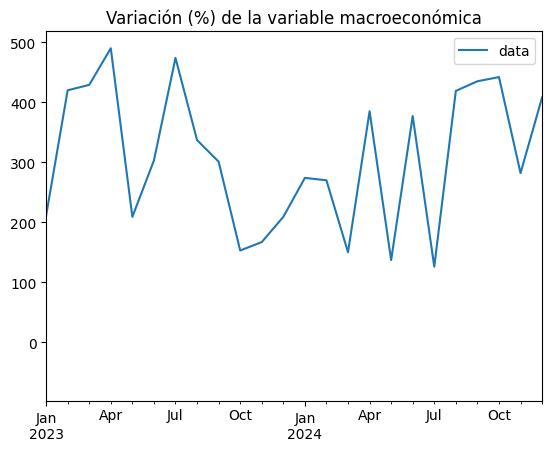

In [ ]:
df_datetime.plot()
plt.plot(df.index, df['pct_change'], color='b')
plt.title('Variación (%) de la variable macroeconómica')
plt.show()

V.

In [ ]:
df_quarterly = df.resample('Q').asfreq().fillna(method='bfill')

<ipython-input-9-172236cb5917>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_quarterly = df.resample('Q').asfreq().fillna(method='bfill')


In [ ]:
print("DataFrame Trimestral")
print(df_quarterly.head())

DataFrame Trimestral
            data  lagged  shifted  pct_change
2023-03-31   320   489.0    416.0  -23.076923
2023-06-30   364   220.0    461.0  -21.041215
2023-09-30   346   397.0    445.0  -22.247191
2023-12-31   216   460.0    359.0  -39.832869
2024-03-31   240   166.0    303.0  -20.792079


VI.

In [ ]:
df_monthly_interpolated = df_quarterly.resample('M').interpolate(method='ffill')

<ipython-input-11-17de6d9ee449>:1: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_monthly_interpolated = df_quarterly.resample('M').interpolate(method='ffill')


In [ ]:
print("DataFrame Mensual")
print(df_monthly_interpolated.head())

DataFrame Mensual
             data  lagged  shifted  pct_change
2023-03-31  320.0   489.0    416.0  -23.076923
2023-04-30  320.0   489.0    416.0  -23.076923
2023-05-31  320.0   489.0    416.0  -23.076923
2023-06-30  364.0   220.0    461.0  -21.041215
2023-07-31  364.0   220.0    461.0  -21.041215
